In [7]:
import numpy as np                                                                                        
import matplotlib.pyplot as plt
import ROOT

In [8]:
mapsas = ["HPK28_1","HPK28_2","HPK29_2","HPK30_1","HPK30_2","HPK31_1","HPK31_2","HPK32_2","HPK33_1","HPK33_2",
    "HPK34_1","HPK34_2","HPK35_1","HPK35_2","HPK36_1","HPK36_2","HPK37_1","HPK37_2","HPK38_1","HPK38_2",
    "QuikPak_PS-p-P1","QuikPak_PS-p-P1_4","QuikPak_PS-p-P2","QuikPak_PS-p-P2_4"
         ]

In [9]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(1)

In [10]:
# initialize
h = [ROOT.TH1F()]*16
colors = [1,2,3,4,5,6,7,15,1,2,3,4,5,6,7,15]
styles = [1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2]

In [11]:
def fix_overflow(hist,xmax):
    imax = hist.FindBin(xmax)-1
    overflow = hist.Integral(imax+1,-1)
    
    hist.SetBinContent(imax,overflow)
    for i in range(imax+1,hist.GetNbinsX()+1):
        hist.SetBinContent(i,0)
    return hist

BBnoisefiles/HPK28_1_BB_noise
BBnoisefiles/HPK28_2_BB_noise
BBnoisefiles/HPK29_2_BB_noise
BBnoisefiles/HPK30_1_BB_noise
BBnoisefiles/HPK30_2_BB_noise
BBnoisefiles/HPK31_1_BB_noise
BBnoisefiles/HPK31_2_BB_noise
BBnoisefiles/HPK32_2_BB_noise
BBnoisefiles/HPK33_1_BB_noise
BBnoisefiles/HPK33_2_BB_noise
BBnoisefiles/HPK34_1_BB_noise
BBnoisefiles/HPK34_2_BB_noise
BBnoisefiles/HPK35_1_BB_noise
BBnoisefiles/HPK35_2_BB_noise
BBnoisefiles/HPK36_1_BB_noise
BBnoisefiles/HPK36_2_BB_noise
BBnoisefiles/HPK37_1_BB_noise
BBnoisefiles/HPK37_2_BB_noise
BBnoisefiles/HPK38_1_BB_noise
BBnoisefiles/HPK38_2_BB_noise
BBnoisefiles/QuikPak_PS-p-P1_BB_noise
BBnoisefiles/QuikPak_PS-p-P1_4_BB_noise
BBnoisefiles/QuikPak_PS-p-P2_BB_noise
BBnoisefiles/QuikPak_PS-p-P2_4_BB_noise


Info in <TCanvas::Print>: png file BBnoisefiles/HPK28_1_BB_noise.png has been created
Info in <TCanvas::Print>: pdf file BBnoisefiles/HPK28_1_BB_noise.pdf has been created
Info in <TCanvas::Print>: png file BBnoisefiles/HPK28_2_BB_noise.png has been created
Info in <TCanvas::Print>: pdf file BBnoisefiles/HPK28_2_BB_noise.pdf has been created
Info in <TCanvas::Print>: png file BBnoisefiles/HPK29_2_BB_noise.png has been created
Info in <TCanvas::Print>: pdf file BBnoisefiles/HPK29_2_BB_noise.pdf has been created
Info in <TCanvas::Print>: png file BBnoisefiles/HPK30_1_BB_noise.png has been created
Info in <TCanvas::Print>: pdf file BBnoisefiles/HPK30_1_BB_noise.pdf has been created
Info in <TCanvas::Print>: png file BBnoisefiles/HPK30_2_BB_noise.png has been created
Info in <TCanvas::Print>: pdf file BBnoisefiles/HPK30_2_BB_noise.pdf has been created
Info in <TCanvas::Print>: png file BBnoisefiles/HPK31_1_BB_noise.png has been created
Info in <TCanvas::Print>: pdf file BBnoisefiles/HPK31_

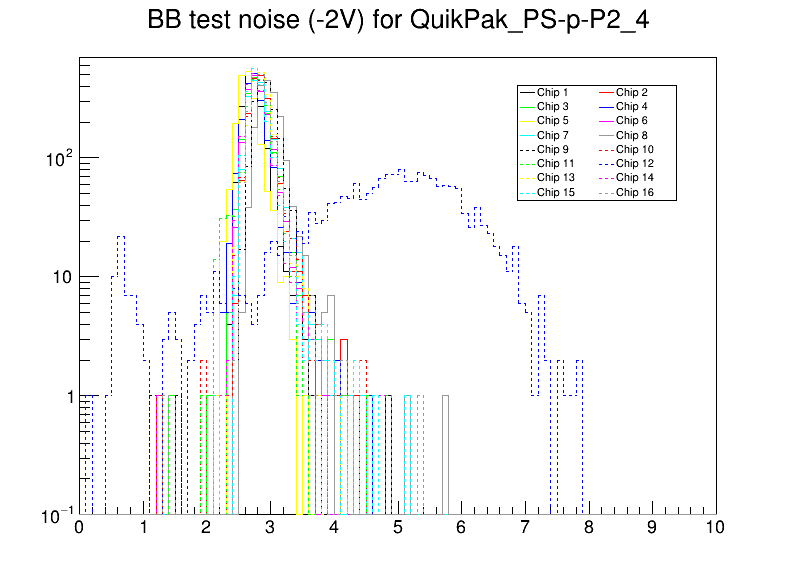

In [12]:
cal = False
bb = True
for mapsaname in mapsas:

    histtitle = "Mean THR noise for " + mapsaname
    if cal:
        histtitle ="Mean CAL noise for " + mapsaname
    if bb:
        histtitle = "BB test noise (-2V) for " + mapsaname 

    hfile = ROOT.TFile.Open("BBnoisefiles/BBstudy_"+mapsaname+".root")
    hname_prefix = "h_noise_thr_Chip"
    if cal:
        hname_prefix = "h_noise_cal_Chip"
    if bb:
        hname_prefix = "h_noise_bum_Chip"

    leg = ROOT.TLegend(0.15,0.65,0.35,0.85)
    if bb:
        leg = ROOT.TLegend(0.65,0.65,0.85,0.85)
    leg.SetNColumns(2)


    xmax = 100
    if cal:
        xmax = 25
    if bb:
        xmax = 10
    
    ymax = 0
    for i in range(0,16):
        h[i] = hfile.Get(hname_prefix+str(i+1))
        h[i].SetLineColor(colors[i])
        h[i].SetMarkerColor(colors[i])
        h[i].SetLineStyle(styles[i])
        leg.AddEntry(h[i],"Chip "+str(i+1),"l")
        h[i] = fix_overflow(h[i],xmax)

        if h[i].GetMaximum() > ymax:
            ymax = h[i].GetMaximum()
    
    c = ROOT.TCanvas(mapsaname,mapsaname,800,600)
    ROOT.gPad.SetLogy()
    
    h[0].SetTitle(histtitle)
    h[0].GetXaxis().SetRangeUser(0,xmax)
    h[0].GetYaxis().SetRangeUser(.1,ymax*1.25)
    h[0].Draw("hist")
    for i in range (1,16):
        h[i].Draw("histsame")
    leg.Draw()

    c.Draw()
    
    savename = "BBnoisefiles/"+mapsaname+"_THR_noise"
    if cal:
        savename = "BBnoisefiles/"+mapsaname+"_CAL_noise"
    if bb:
        savename = "BBnoisefiles/"+mapsaname+"_BB_noise"

    print(savename)
    c.SaveAs(savename+".png")
    c.SaveAs(savename+".pdf")